In [20]:
%matplotlib widget

In [21]:
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import EarthLocation
import matplotlib.pyplot as plt
import numpy as np
import requests
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Polygon
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"
import pandas as pd

### Load Alex's DECam telemetry and streaks tables

In [2]:
telemetry1 = pd.read_csv('decam_telemetry_20230817.csv')

In [3]:
telemetry1

,EXPNUM,BAND,TELESCOP,OBSERVAT,INSTRUME,OBS-LONG,OBS-LAT,OBS-ELEV,TELEQUIN,TIMESYS,DATE-OBS,TIME-OBS,DARKTIME,EXPTIME,RA,DEC,AZ,ZD
0,140520,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:25:35.429106,00:25:35.429106,2.10353,1.0,22:08:24.000,-32:59:17.599,116.2500,7.09
1,140521,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:29:50.667562,00:29:50.667562,2.09597,1.0,22:08:23.970,-32:55:57.799,118.9300,6.25
2,140522,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:46:16.576959,00:46:16.576959,31.09820,30.0,18:03:35.240,-30:02:00.600,254.2700,50.20
3,140523,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:47:44.370016,00:47:44.370016,31.09300,30.0,18:03:35.250,-30:02:00.802,254.1500,50.50
4,140524,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:49:47.211636,00:49:47.211636,31.09170,30.0,18:03:35.240,-30:02:00.802,253.9900,50.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506513,1228730,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:42:53.917964,08:42:53.917964,81.10140,80.0,03:30:36.090,-28:05:58.200,97.1620,36.05
506514,1228731,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:44:44.058111,08:44:44.058111,71.12170,70.0,03:30:36.079,-28:05:58.200,97.0003,35.66
506515,1228732,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:46:22.681357,08:46:22.681357,71.10870,70.0,03:30:36.090,-28:05:58.200,96.8515,35.30
506516,1228733,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:48:02.549261,08:48:02.549261,91.09020,90.0,03:30:36.112,-28:05:58.099,96.7036,34.94


In [4]:
telemetry1.columns

Index(['EXPNUM', 'BAND', 'TELESCOP', 'OBSERVAT', 'INSTRUME', 'OBS-LONG',
       'OBS-LAT', 'OBS-ELEV', 'TELEQUIN', 'TIMESYS', 'DATE-OBS', 'TIME-OBS',
       'DARKTIME', 'EXPTIME', 'RA', 'DEC', 'AZ', 'ZD'],
      dtype='object')

In [5]:
streaks1 = pd.read_csv('streaks_augmented_20230817.csv')

In [6]:
streaks1

,filename,rnum,ra_1,ra_2,ra_3,ra_4,dec_1,dec_2,dec_3,dec_4,expnum,ccdnum,band
0,D00145425_g_c03_r4148p01_hstreak.fits,3,1.159330,1.160919,1.164310,1.162720,-28.724241,-28.724212,-28.857155,-28.857183,145425,3,g
1,D00145425_g_c06_r4148p01_hstreak.fits,1,0.986677,0.986711,0.644209,0.644186,-29.032018,-29.034283,-29.037208,-29.034944,145425,6,g
2,D00145425_g_c09_r4148p01_hstreak.fits,1,0.452852,0.452942,0.109842,0.109782,-29.193042,-29.199694,-29.203265,-29.196615,145425,9,g
3,D00145425_g_c15_r4148p01_hstreak.fits,1,0.286716,0.286812,0.630816,0.630741,-29.363308,-29.358405,-29.362739,-29.367644,145425,15,g
4,D00145425_g_c16_r4148p01_hstreak.fits,1,0.985852,0.987446,0.987211,0.985615,-29.216748,-29.216752,-29.366385,-29.366381,145425,16,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879115,D01223535_g_c05_r6224p01_hstreak.fits,1,323.500201,323.502653,323.444690,323.442238,-17.828499,-17.830897,-17.884254,-17.881855,1223535,5,g
879116,D01223535_g_c31_r6224p01_hstreak.fits,1,324.355544,324.369908,324.372363,324.357994,-18.392109,-18.391941,-18.541070,-18.541235,1223535,31,g
879117,D01223535_g_c56_r6224p01_hstreak.fits,1,322.914589,322.934330,322.849385,322.829651,-19.193809,-19.210870,-19.298406,-19.281342,1223535,56,g
879118,D01223535_g_c58_r6224p01_hstreak.fits,1,323.771850,323.783894,323.835739,323.823696,-19.214779,-19.204086,-19.255903,-19.266598,1223535,58,g


In [17]:
one_streak_obs = telemetry1.loc[(telemetry1['EXPNUM'] == 1223535)]

In [18]:
one_streak_obs

,EXPNUM,BAND,TELESCOP,OBSERVAT,INSTRUME,OBS-LONG,OBS-LAT,OBS-ELEV,TELEQUIN,TIMESYS,DATE-OBS,TIME-OBS,DARKTIME,EXPTIME,RA,DEC,AZ,ZD
504526,1223535,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-07-21 04:39:17.941009,04:39:17.941009,91.094,90.0,21:34:00.689,-18:32:55.702,69.7555,26.48


### Set the parameters for a SatChecker query

In [26]:
fov_radius = 1  # degree radius for the satchecker query
location = EarthLocation.of_site('ctio')
latitude = location.lat.value  # deg
longitude = location.lon.value  # deg
elevation = location.height.value  # meters

In [63]:
duration = one_streak_obs['EXPTIME'].values[0]
start_time_jd = Time(one_streak_obs['DATE-OBS'].values[0]).jd

In [64]:
coord = SkyCoord(ra=one_streak_obs['RA'].values[0], dec=one_streak_obs['DEC'].values[0], unit=u.deg)

In [65]:
ra_center = coord.icrs.ra.value
dec_center = coord.icrs.dec.value

In [66]:
# Make the SatChecker API request
url_string = f"https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude={latitude}&longitude={longitude}&elevation={elevation}&start_time_jd={start_time_jd}&duration={duration}&ra={ra_center}&dec={dec_center}&fov_radius={fov_radius}&group_by=satellite"
response = requests.get(url_string, timeout=60)
data = response.json()
print(url_string)

https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude=-30.165277777777778&longitude=-70.815&elevation=2214.9999999993697&start_time_jd=2460146.6939576506&duration=90.0&ra=21.566858055555556&dec=-18.548806111111112&fov_radius=1&group_by=satellite


In [68]:
# Extract RA/Dec positions for each satellite
satellites = {}

for sat_key, sat_data in data['data']['satellites'].items():
    if sat_key not in satellites:
        satellites[sat_key] = []
    # Add ra, dec, and julian_date from each position
    for position in sat_data['positions']:
        satellites[sat_key].append([
            position['ra'],
            position['dec'],
            position['julian_date']
        ])

print(f"Public catalog satellites passing through the specified FOV, as seen from CTIO, starting at {start_time_jd} JD for {duration} seconds:")
for sat in satellites:
    print(f"{sat}: {len(satellites[sat])} points")

Public catalog satellites passing through the specified FOV, as seen from CTIO, starting at 2460146.6939576506 JD for 90.0 seconds:
ONEWEB-0332 (49279): 5 points
STARLINK-4549 (53433): 7 points


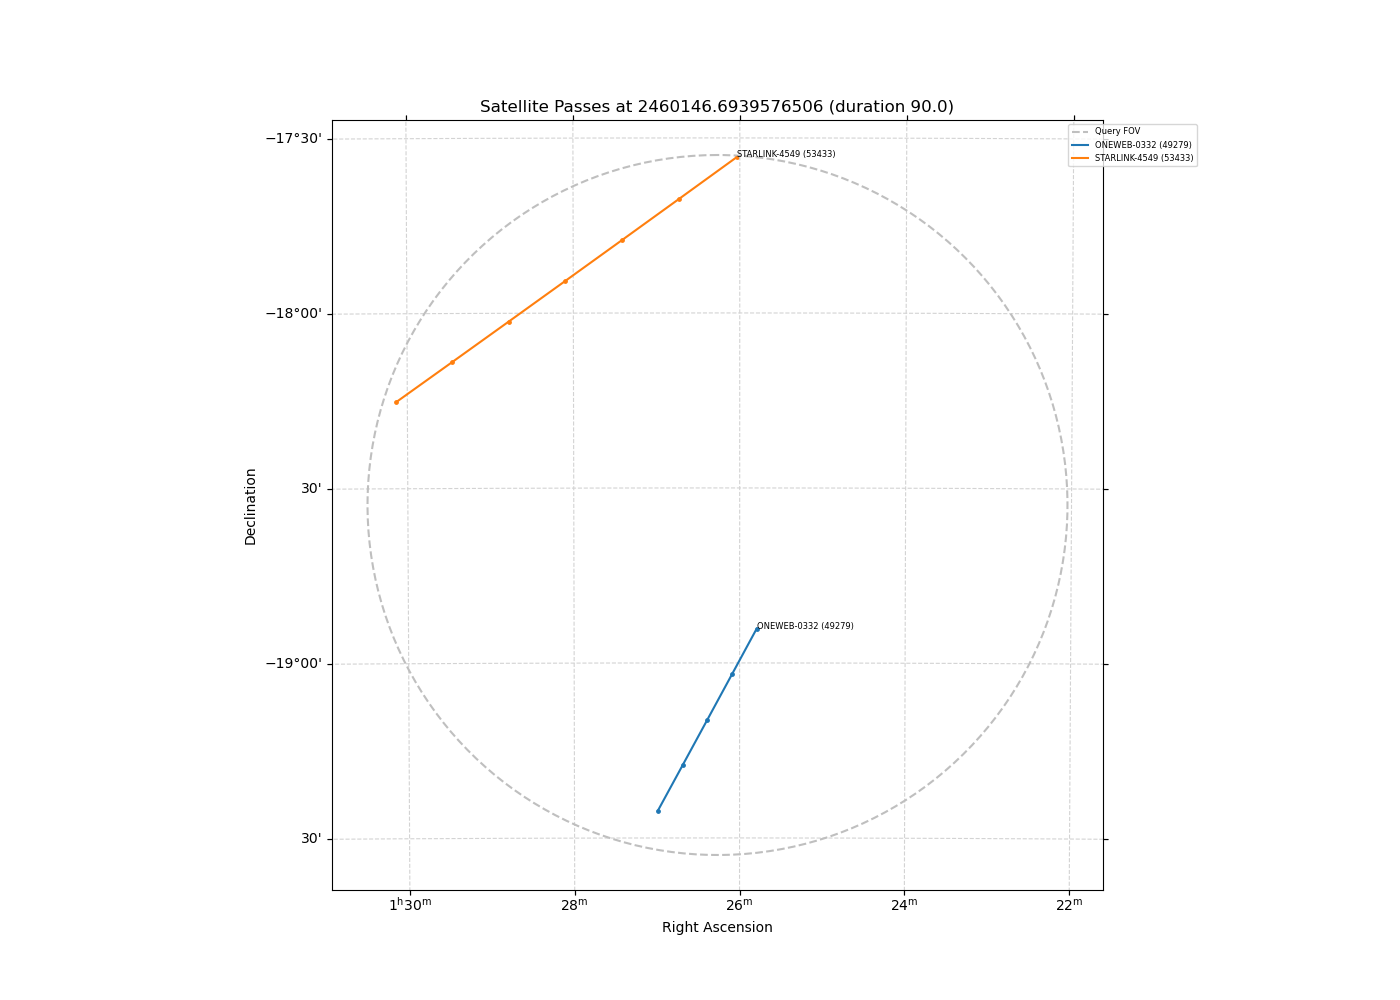

In [70]:
# Simple WCS for the plot
wcs = WCS(naxis=2)
wcs.wcs.crpix = [0, 0]
wcs.wcs.crval = [ra_center, dec_center]
wcs.wcs.cdelt = [0.1, 0.1]
wcs.wcs.ctype = ['RA---TAN', 'DEC--TAN']

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1, projection=wcs)
center = SkyCoord(ra=ra_center*u.deg, dec=dec_center*u.deg, frame='icrs')
position_angles = np.linspace(0, 360, 360) * u.deg
circle_points = center.directional_offset_by(position_angles, fov_radius * u.deg)

# Query FOV
ax.plot(circle_points.ra.deg, circle_points.dec.deg, 
        c='0.75', ls='--', label='Query FOV', transform=ax.get_transform('world'))

# Satellite tracks
for sat_name in satellites.keys():
    ra = [pos[0] for pos in satellites[sat_name]]
    dec = [pos[1] for pos in satellites[sat_name]]
    coords = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)
    
    # Satellite track
    ax.plot(coords.ra.deg, coords.dec.deg, 
            transform=ax.get_transform('world'),
            label=sat_name)
        
    # Satellite position points
    ax.scatter(coords.ra.deg, coords.dec.deg, 
               transform=ax.get_transform('world'), s=6)
    
    # Start and end labels
    times = [pos[2] for pos in satellites[sat_name]]
    if coords.ra.deg[0] < coords.ra.deg[-1]:
        ax.text(coords.ra.deg[0], coords.dec.deg[0], f'{sat_name}', 
                transform=ax.get_transform('world'), fontsize="6")  
    else:
        ax.text(coords.ra.deg[-1], coords.dec.deg[-1], f'{sat_name}', 
            transform=ax.get_transform('world'), fontsize="6")

ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(0.95, 1), loc='upper left', fontsize="6")
ax.set_xlabel('Right Ascension')
ax.invert_xaxis()
ax.set_ylabel('Declination')
ax.set_title(f'Satellite Passes at {start_time_jd} (duration {duration:.1f})')
ax.grid(color='lightgray', linestyle='--')
